# Data Analysis over the Clusters
## Loading libraries

In [1]:
import numpy as np
import cygnus_lib as cy
import toolslib as tl
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from ast import literal_eval
from math import degrees

## font definition
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

## Variables definition

In [2]:
x_resolution = y_resolution = 2048
rescale      = 512
scale        = int(x_resolution/rescale)
pixelscale   = 55e-3             #55e-3 for Orange ------ 0.125 for lemonn mm/pixel

## Loading data

List contain:

[0 - Run number, 1 - Image Number, 2 - Tag of the cluster, 3 - Pixel X position, 4 - Pixel Y position, 5 - Light in the pixel, 6 - Pedestal in the pixel]

In [5]:

run = 815

tic=time()
#------------------- Loading File ------------------------------#
directory = ("./data/")          # Directory of the output file
filename  = ("ClustersTable_%d_tight" % run)    # Name of the output file
extension = (".csv")             # Extension of the output file
dataout = directory + filename + extension # Full path of the output file

dt = {'Run': np.int64, 'Image': np.int64, 'Tag': np.object, 'X': np.object, 'Y': np.object, 'Light': np.object, 'Pedestal': np.object}
colhead = ["Run","Image","Tag","X","Y","Light","Pedestal"]
df = pd.read_csv(dataout,dtype=dt)

In [6]:
df.loc[:,'X'] = df.loc[:,'X'].apply(literal_eval)
df.loc[:,'Y'] = df.loc[:,'Y'].apply(literal_eval)
df.loc[:,'Light'] = df.loc[:,'Light'].apply(literal_eval)
df.loc[:,'Pedestal'] = df.loc[:,'Pedestal'].apply(literal_eval)
toc = time()

In [7]:
print("Loading time: %.2f" % ((toc-tic)/60))

Loading time: 1.13


In [22]:
# Showing the table
df[df.Image == 20]

,Run,Image,Tag,X,Y,Light,Pedestal
1955,815,20,l,"[1096, 1096, 1096, 1096, 1097, 1097, 1097, 109...","[284, 285, 286, 287, 284, 285, 286, 287, 284, ...","[101, 101, 103, 124, 113, 100, 97, 103, 94, 99...","[101, 101, 101, 108, 108, 101, 100, 102, 100, ..."
1956,815,20,l,"[1412, 1412, 1412, 1412, 1413, 1413, 1413, 141...","[440, 441, 442, 443, 440, 441, 442, 443, 440, ...","[99, 96, 103, 100, 106, 102, 99, 111, 105, 105...","[101, 100, 100, 98, 101, 100, 100, 101, 100, 1..."
1957,815,20,l,"[300, 300, 300, 300, 301, 301, 301, 301, 302, ...","[592, 593, 594, 595, 592, 593, 594, 595, 592, ...","[101, 103, 102, 97, 101, 98, 103, 102, 103, 11...","[101, 101, 115, 101, 101, 100, 101, 101, 101, ..."
1958,815,20,l,"[280, 280, 280, 280, 281, 281, 281, 281, 282, ...","[756, 757, 758, 759, 756, 757, 758, 759, 756, ...","[100, 103, 101, 100, 106, 99, 114, 103, 98, 10...","[101, 100, 101, 101, 100, 101, 101, 101, 100, ..."
1959,815,20,l,"[1224, 1224, 1224, 1224, 1225, 1225, 1225, 122...","[808, 809, 810, 811, 808, 809, 810, 811, 808, ...","[100, 101, 97, 100, 104, 103, 103, 104, 104, 9...","[100, 100, 101, 100, 103, 101, 101, 101, 104, ..."
1960,815,20,l,"[1388, 1388, 1388, 1388, 1389, 1389, 1389, 138...","[836, 837, 838, 839, 836, 837, 838, 839, 836, ...","[101, 96, 102, 98, 104, 100, 97, 103, 101, 101...","[101, 101, 102, 101, 102, 101, 100, 101, 101, ..."
1961,815,20,l,"[1168, 1168, 1168, 1168, 1169, 1169, 1169, 116...","[920, 921, 922, 923, 920, 921, 922, 923, 920, ...","[103, 103, 106, 105, 105, 108, 96, 99, 108, 99...","[99, 104, 102, 100, 101, 103, 102, 102, 101, 1..."
1962,815,20,l,"[1048, 1048, 1048, 1048, 1049, 1049, 1049, 104...","[1000, 1001, 1002, 1003, 1000, 1001, 1002, 100...","[98, 95, 101, 105, 103, 102, 100, 110, 110, 99...","[102, 102, 101, 103, 100, 100, 101, 101, 101, ..."
1963,815,20,l,"[1276, 1276, 1276, 1276, 1277, 1277, 1277, 127...","[1080, 1081, 1082, 1083, 1080, 1081, 1082, 108...","[102, 105, 104, 105, 99, 101, 102, 130, 99, 10...","[100, 101, 102, 101, 101, 103, 101, 110, 101, ..."
1964,815,20,l,"[1500, 1500, 1500, 1500, 1501, 1501, 1501, 150...","[1160, 1161, 1162, 1163, 1160, 1161, 1162, 116...","[98, 100, 98, 97, 105, 100, 99, 101, 101, 100,...","[99, 101, 101, 101, 101, 101, 101, 101, 101, 1..."


In [9]:
variables = df.iloc[:,0:3].copy()
variables.head(n = 5)

,Run,Image,Tag
0,815,0,l
1,815,0,l
2,815,0,l
3,815,0,l
4,815,0,l


## Declaration  of the new variables

In [10]:
sl = np.zeros(df.shape[0],dtype=float)
sb = np.zeros(df.shape[0],dtype=float)
sp = np.zeros(df.shape[0],dtype=float)
co = np.zeros(df.shape[0],dtype=float)
slp = np.zeros(df.shape[0],dtype=float)

In [11]:
## Loop to calculate the new variables
pedestal = 99
for ind in range(0,df.shape[0]):
    sl[ind] = np.sum(df.Light[ind])
    sb[ind] = np.sum(df.Pedestal[ind])
    sp[ind] = np.size(df.X[ind])
    co[ind] = np.abs(np.corrcoef(df.X[ind],df.Y[ind])[0][1])
    slp[ind] = np.sum(np.array(df.Light[ind])-pedestal)
    #lenY[ind]  = np.mean(np.unique(df.X[ind],return_counts=True)[1]*scale)
    #lenX[ind]  = np.mean(np.unique(df.Y[ind],return_counts=True)[1]*scale)

In [12]:
# Insertion in the table

variables.insert(3,'SumLight',sl)
variables.insert(4,'SumPedestal',sb)
variables.insert(5,'SumPixels',sp)
variables.insert(6,'PhotonPPixels',(slp)/sp)
variables.insert(7,'XYCorrelation',co)
variables.insert(8,'LightPPixel',sl/sp)

In [13]:
variables.head(n=10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
0,815,0,l,84441.0,78097.0,768.0,10.949219,0.225307,109.949219
1,815,0,l,57296.0,52039.0,512.0,12.906250,0.113040,111.906250
2,815,0,l,76074.0,68260.0,672.0,14.205357,0.255157,113.205357
3,815,0,l,30979.0,29263.0,288.0,8.565972,0.470319,107.565972
4,815,0,l,69363.0,64958.0,640.0,9.379687,0.305581,108.379688
5,815,0,m,34617.0,34126.0,336.0,4.026786,0.528677,103.026786
6,815,0,m,29191.0,27636.0,272.0,8.319853,0.224861,107.319853
7,815,0,s,8254.0,8162.0,80.0,4.175000,0.266336,103.175000
8,815,0,s,8197.0,8112.0,80.0,3.462500,0.689520,102.462500
9,815,0,s,22088.0,21118.0,208.0,7.192308,0.249783,106.192308


In [14]:
#variables=variables[(variables.Image <= 210) & (variables.Image != 41) & (variables.Image != 83) & (variables.Image != 93) & (variables.Image != 209)].copy()
#df=df[(df.Image <= 210) & (df.Image != 41) & (df.Image != 83) & (df.Image != 93) & (df.Image != 209)].copy()

In [15]:
#df[(df.Tag == 'l') & (df.Image < 62)]

In [16]:
PPP = tl.getTaggedVariable(variables,'PhotonPPixels')
LPP = tl.getTaggedVariable(variables,'LightPPixel')
SLP = tl.getTaggedVariable(variables,'SumLight')
COR = tl.getTaggedVariable(variables,'XYCorrelation')

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


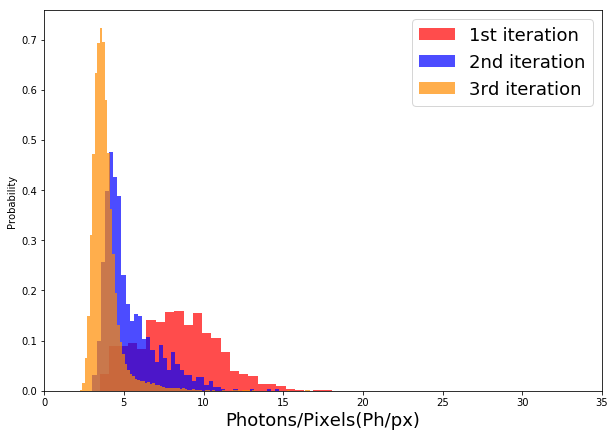

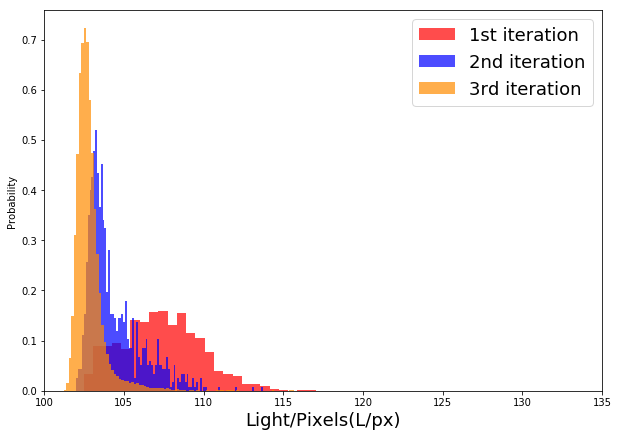

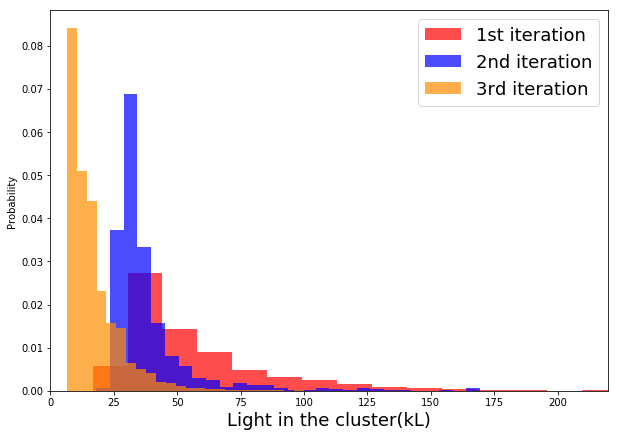

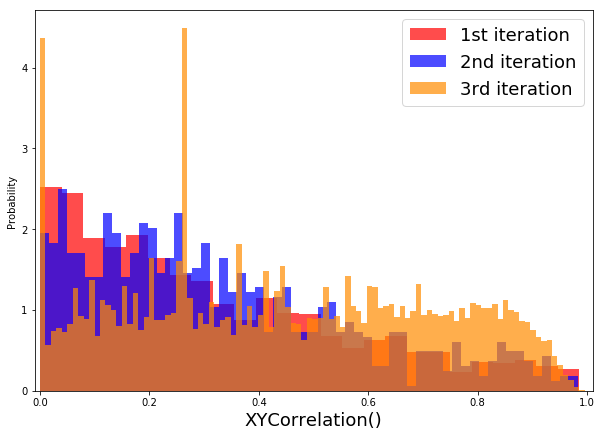

In [19]:
leg = ['1st iteration', '2nd iteration', '3rd iteration']

tl.plot2hist(PPP, bins = [25,45,400], liml = 0, limr = 35, label='Photons/Pixels', scale = '', unity = 'Ph/px', leg=leg, logx = False, logy = False)
#plt.savefig('./images/Phpx.pdf', format='pdf',bbox_inches = 'tight', pad_inches = 0)
tl.plot2hist(LPP, bins = [25,100,400], liml = 100, limr = 135, label='Light/Pixels', scale = '', unity = 'L/px', leg=leg, logx = False, logy = False)
tl.plot2hist(SLP, bins = [40,40,50], liml = 0, limr = 220, label='Light in the cluster', scale = 'k', unity = 'L', leg=leg, logx = False, logy = False)
tl.plot2hist(COR, bins = [25,60,100], liml = -0.01, limr = 1.01, label='XYCorrelation', scale = '', unity = '', leg=leg, logx = False, logy = False)

## Developing 

In [18]:
featuresL = variables[variables.Tag == 'l'].copy()
featuresL.head(n = 10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
0,815,0,l,31345.0,30860.0,304.0,4.108553,0.455279,103.108553
1,815,0,l,24970.0,24402.0,240.0,5.041667,0.117764,104.041667
2,815,0,l,87800.0,81351.0,800.0,10.750000,0.246844,109.750000
3,815,0,l,57296.0,52039.0,512.0,12.906250,0.113040,111.906250
4,815,0,l,77695.0,69880.0,688.0,13.928779,0.180242,112.928779
5,815,0,l,29191.0,27636.0,272.0,8.319853,0.224861,107.319853
6,815,0,l,30979.0,29263.0,288.0,8.565972,0.470319,107.565972
7,815,0,l,27015.0,25984.0,256.0,6.527344,0.262743,105.527344
8,815,0,l,70989.0,66577.0,656.0,9.214939,0.278300,108.214939
243,815,1,l,39287.0,37399.0,368.0,7.758152,0.096063,106.758152


In [19]:
maxLX = np.zeros(featuresL.shape[0],dtype=float)
maxLY = np.zeros(featuresL.shape[0],dtype=float)
meanLX = np.zeros(featuresL.shape[0],dtype=float)
meanLY = np.zeros(featuresL.shape[0],dtype=float)


p = np.zeros(featuresL.shape[0],dtype=float)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -#
# Y information
widthY = np.zeros(featuresL.shape[0],dtype=float)
startY = np.zeros(featuresL.shape[0],dtype=float)
endY = np.zeros(featuresL.shape[0],dtype=float)


# X information
widthX = np.zeros(featuresL.shape[0],dtype=float)
meanX = np.zeros(featuresL.shape[0],dtype=float)
peakX = np.zeros(featuresL.shape[0],dtype=float)
startX = np.zeros(featuresL.shape[0],dtype=float)
endX = np.zeros(featuresL.shape[0],dtype=float)
startXy = np.zeros(featuresL.shape[0],dtype=float)
endXy = np.zeros(featuresL.shape[0],dtype=float)

In [ ]:
range(0,3)

Rotation Angle: 26.63
Rotation Angle2: 37.97


/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


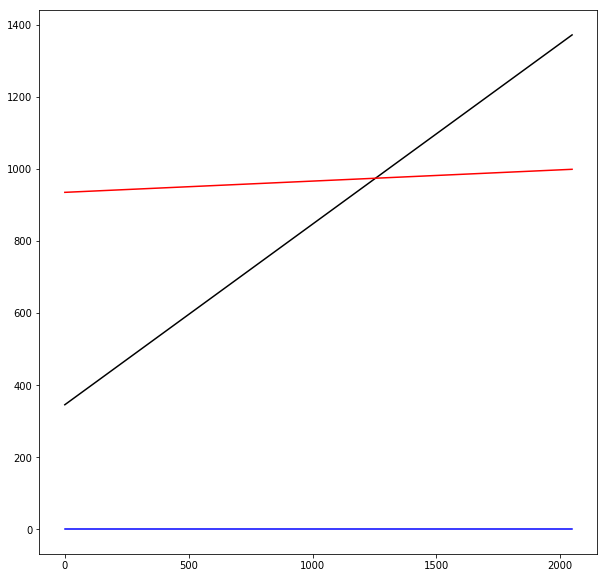

In [52]:
from numpy import polyfit
from numpy import poly1d
from numpy import arctan
from numpy import arctan2

X = df.X[ind]
Y = df.Y[ind]

xo = [-2048,2048]
yo = [0.001,0.001]

zo = polyfit(xo,yo, 1)
fo = poly1d(zo)    
m1 = fo.c[0] 

z = polyfit(X,Y, 1)
func = poly1d(z) 
m2 = func.c[0]

angle = arctan(m2)
angle2 = arctan2(np.mean(Y),np.mean(X[0]))
print("Rotation Angle: %.2f" % (degrees(angle)))
print("Rotation Angle2: %.2f" % (degrees(angle2)))

newX, newY = tl.rotate(np.mean(X),np.mean(Y),X,Y,angle2)   
z1 = np.polyfit(newX,newY, 1)
func1 = np.poly1d(z1)

xp = np.linspace(0, 2048, 100)

fig = plt.figure(figsize=(10,10))
plt.plot(xp, func(xp), '-k')
plt.plot(xp, fo(xp), '-b')
plt.plot(xp, func1(xp), '-r')

/home/igorabritta/cygno/toolslib.py:174: RankWarning: Polyfit may be poorly conditioned
  zo = polyfit(yo,xo, 1)
/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


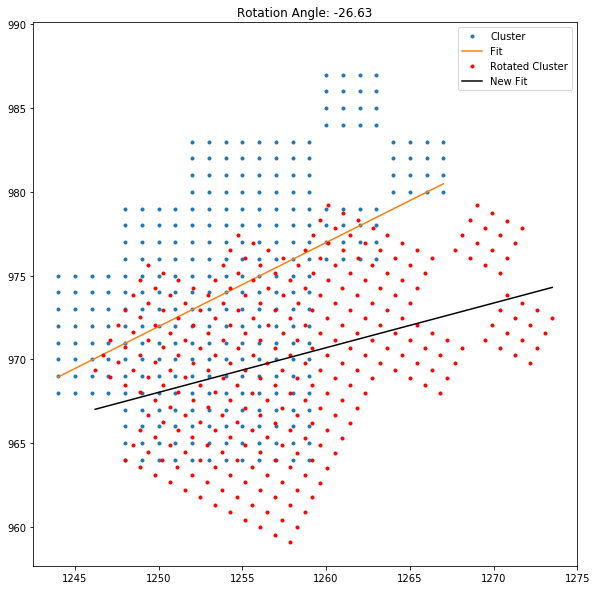

Press <ret> to continue -> stop


In [23]:
tag = 'l'
debug = True
debug2 = False
it = -1 
for cluN in df[df['Tag'] == tag].index: #[8679]:
    ind = cluN
    it += 1

    angle = tl.getAngle(df.X[ind],df.Y[ind])
    
    newX, newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)   
    
    if debug:
        z = np.polyfit(df.X[ind],df.Y[ind], 1)
        func = np.poly1d(z)

        xp = np.linspace(np.min(df.X[ind]), np.max(df.X[ind]), 100)

        z1 = np.polyfit(newX,newY, 1)
        func1 = np.poly1d(z1)

        xp1 = np.linspace(np.min(newX), np.max(newX), 100)

        fig = plt.figure(figsize=(10,10))
        plt.plot(df.X[ind],df.Y[ind], '.', xp, func(xp), '-')
        plt.plot(newX,newY, '.r', xp1, func1(xp1), '-k')
        #plt.plot(df.X[ind][0],df.Y[ind][0], 'og')
        #plt.plot(newX[0],newY[0], 'oy')
        #plt.plot([Ax, Bx], [Ay, By],'-sc')
        #plt.plot([Sx, Mx],[Sy, My], '-^g')
        
        #plt.xlim(0,2048)
        #plt.ylim(0,2048)
        plt.axis('square')
        plt.title("Rotation Angle: %.2f" % (degrees(angle)))
        plt.legend(["Cluster", "Fit","Rotated Cluster","New Fit"])
        plt.show()

        key = input('Press <ret> to continue -> ')
        if key == 'stop':
            break

        plt.close()
    
    #--------------------------------------------------------------------------------#
    
    widthY[it], widthX[it], peakX[it], meanX[it] = tl.plot_shapeprofile(X = newX,Y = newY, L = df.Light[ind], P = df.Pedestal[ind], px = 10, debug = debug2)
    
    startX[it] = df.X[ind][np.argmin(newX)]
    endX[it] = df.X[ind][np.argmax(newX)]
    startXy[it] = df.Y[ind][np.argmin(newX)]
    endXy[it] = df.Y[ind][np.argmax(newX)]
    
    startY[it] = df.Y[ind][np.argmin(newY)]
    endY[it] = df.Y[ind][np.argmax(newY)]
    
    
    #--------------------------------------------------------------------------------#
    # Calculating length in X and Y
    maxLX[it] = (np.max(newX) - np.min(newX))
    maxLY[it] = (np.max(newY) - np.min(newY))

    meanLY[it] = np.mean(tl.get_sliceleng(X = newX,Y = newY,pieces = 40))
    meanLX[it] = np.mean(tl.get_sliceleng(X = newY,Y = newX,pieces = 5))
    
    #--------------------------------------------------------------------------------#
    # Calculating S and L
    
    S = (np.sqrt((Sx - Mx)**2 + (Sy - My)**2))*pixelscale*1e-3
    L = (np.sqrt((Ax - Bx)**2 + (Ay - By)**2))*pixelscale*1e-3
    B = 0.12
    p[it] = (300/8)*((L**2)*B)/S

In [51]:
# Insertion in the table
featuresL.insert(9,  'MaxLengthX',maxLX)
featuresL.insert(10, 'MaxLengthY',maxLY)
featuresL.insert(11, 'MeanLengthX',meanLX)
featuresL.insert(12, 'MeanLengthY',meanLY)

featuresL.insert(13, 'WidthY',widthY)
featuresL.insert(14, 'StartY',startY)
featuresL.insert(15, 'EndY',endY)

featuresL.insert(16, 'WidthX',widthX)
featuresL.insert(17, 'StartX',startX)
featuresL.insert(18, 'EndX',endX)
featuresL.insert(19, 'StartXy',startXy)
featuresL.insert(20, 'EndXy',endXy)
featuresL.insert(21, 'PeakX',peakX)
featuresL.insert(22, 'MeanX',meanX)

featuresL.insert(23, 'p',p)

In [52]:
ttt = featuresL.index[(featuresL.MaxLengthX > 0) & (featuresL.MaxLengthX < 200)]

In [53]:
featuresL[featuresL.Image < 210].head(n=10)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel,MaxLengthX,...,StartY,EndY,WidthX,StartX,EndX,StartXy,EndXy,PeakX,MeanX,p
91,494,1,l,5812312.0,5292118.0,51024.0,14.913296,0.995025,113.913296,1556.896009,...,1432.0,1371.0,1546.851518,232.0,1739.0,1555.0,1164.0,4671.0,2901.574194,71.328109
1231,494,16,l,2458209.0,2248363.0,21680.0,14.386024,0.373952,113.386024,703.312101,...,1544.0,1595.0,693.119172,792.0,1495.0,1556.0,1579.0,3561.0,2522.362319,8.820116
1317,494,17,l,1253232.0,1130440.0,10928.0,15.680820,0.079112,114.680820,367.120661,...,436.0,479.0,356.922864,1152.0,1519.0,440.0,459.0,3847.0,2826.472222,4.049378
1318,494,17,l,942956.0,847008.0,8192.0,16.106934,0.965863,115.106934,292.005045,...,1324.0,1363.0,281.576293,180.0,439.0,1236.0,1371.0,4526.0,2927.857143,3.094469
1955,494,24,l,2821348.0,2527418.0,24432.0,16.477570,0.996211,115.477570,807.572254,...,724.0,667.0,797.477601,416.0,847.0,144.0,827.0,5197.0,3132.787500,18.814274
2157,494,26,l,1837777.0,1642448.0,15744.0,17.728722,0.947466,116.728722,486.902335,...,744.0,855.0,476.758536,1292.0,1767.0,867.0,760.0,4736.0,3503.416667,7.339798
2564,494,31,l,848350.0,766691.0,7392.0,15.765963,0.211396,114.765963,290.999368,...,396.0,435.0,280.606533,1172.0,1463.0,416.0,419.0,5184.0,2367.428571,9.135186
3283,494,40,l,1056796.0,967458.0,9296.0,14.682874,0.923060,113.682874,346.340849,...,940.0,1007.0,336.154353,1420.0,1759.0,920.0,991.0,3202.0,2177.000000,26.557486
3472,494,42,l,1000498.0,916990.0,8864.0,13.872067,0.940581,112.872067,321.337117,...,1612.0,1667.0,310.971403,448.0,755.0,1719.0,1624.0,4810.0,2345.870968,3.017536
3609,494,43,l,2082452.0,1907168.0,18352.0,14.472755,0.951484,113.472755,608.481552,...,1436.0,1459.0,598.340193,1060.0,1659.0,1459.0,1352.0,4341.0,2495.300000,3.664342


/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


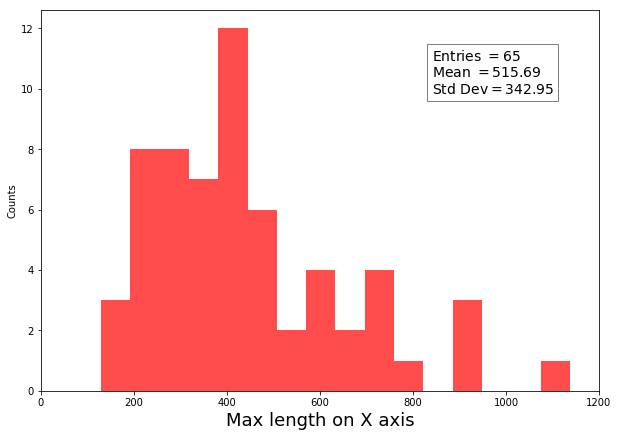

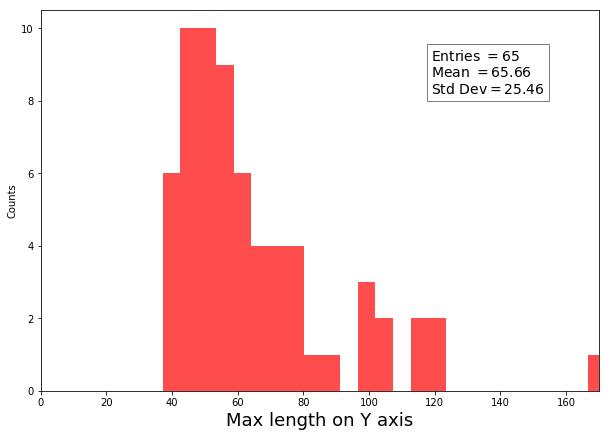

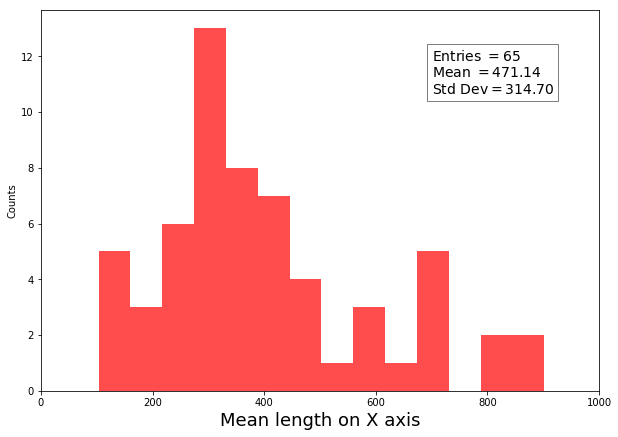

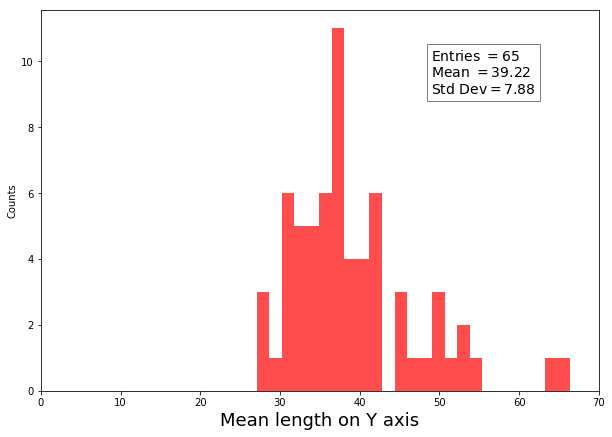

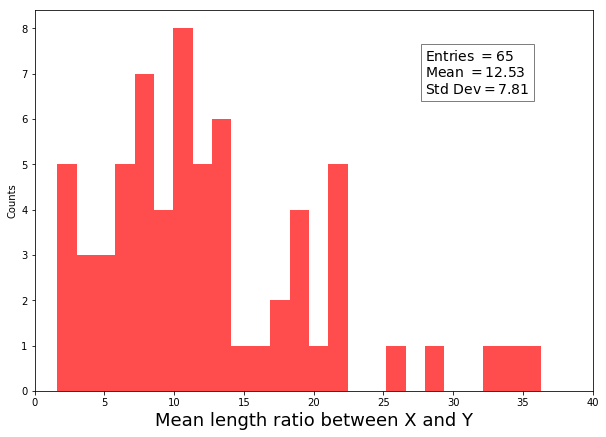

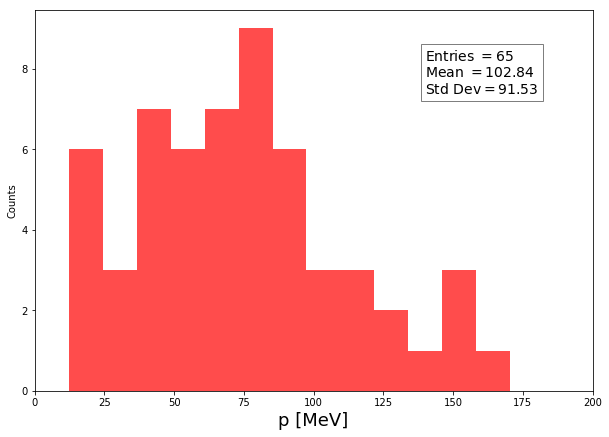

In [56]:
tl.plot1hist(featuresL.MaxLengthX, bins = 25, liml = 0, limr = 1200, label='Max length on X axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.MaxLengthY, bins = 25, liml = 0, limr = 170, label='Max length on Y axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.MeanLengthX, bins = 25, liml = 0, limr = 1000, label='Mean length on X axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.MeanLengthY, bins = 25, liml = 0, limr = 70, label='Mean length on Y axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.MeanLengthX/featuresL.MeanLengthY, bins = 25, liml = 0, limr = 40, label='Mean length ratio between X and Y', logx = False, logy = False, density=False)

tl.plot1hist(featuresL.MeanLengthX/featuresL.p, bins = 40, liml = 0, limr = 200, label='p [MeV]', logx = False, logy = False, density=False)

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


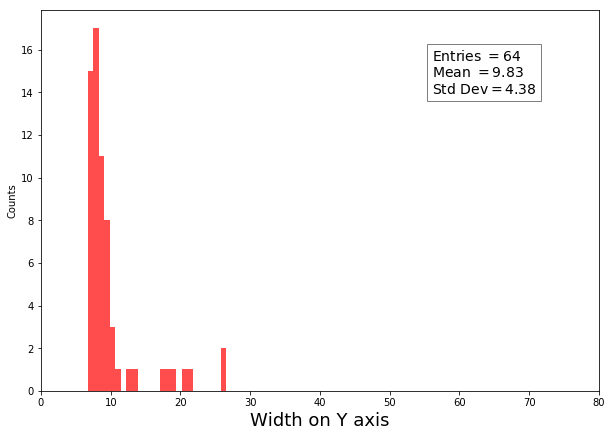

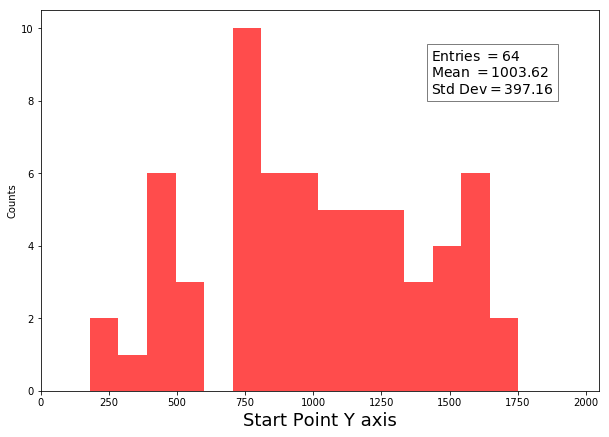

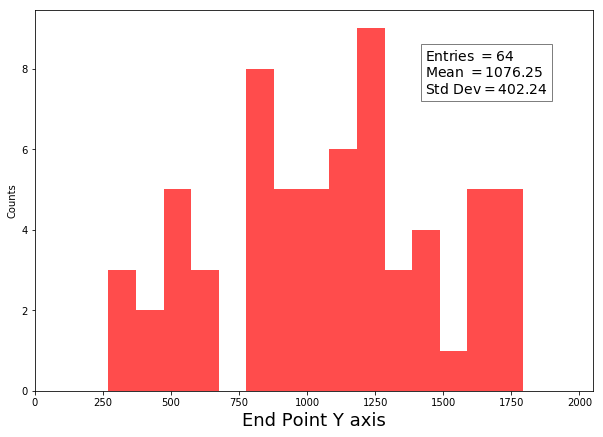

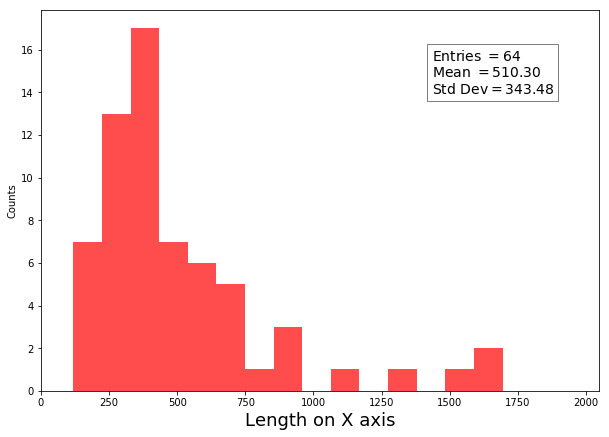

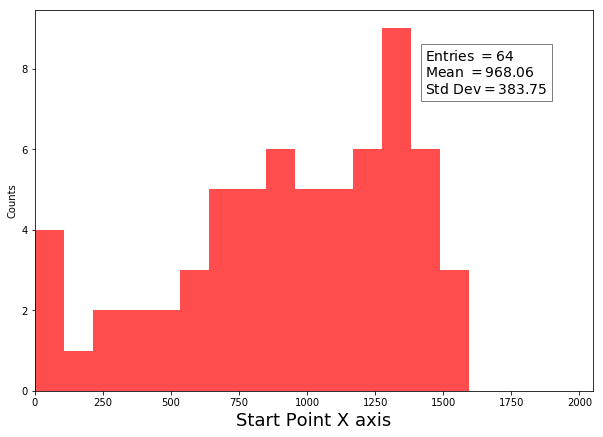

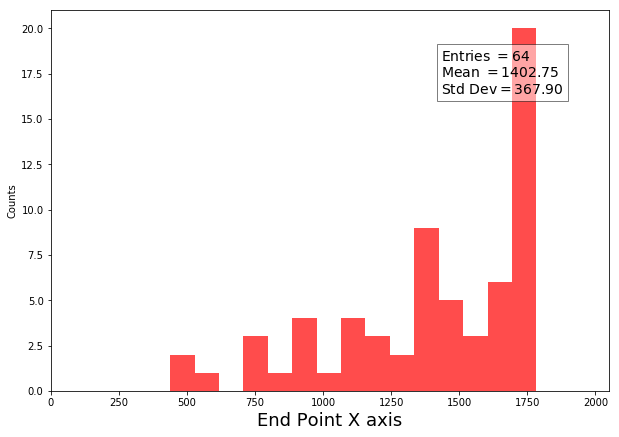

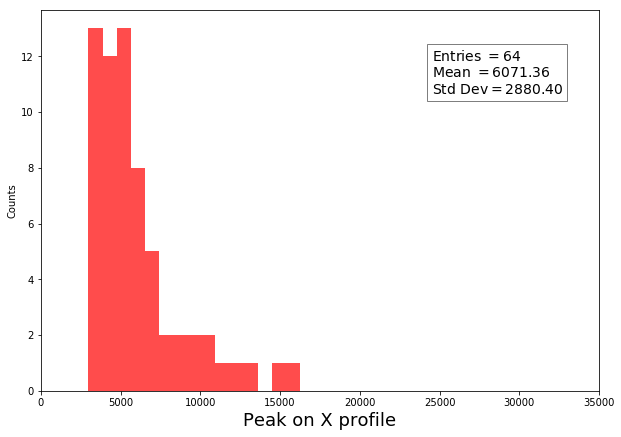

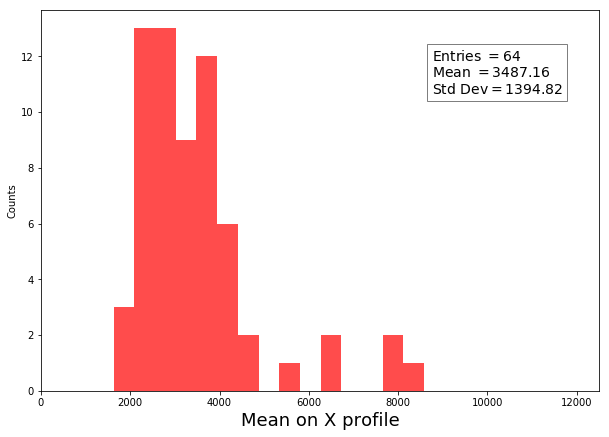

In [22]:
tl.plot1hist(featuresL.WidthY[featuresL.Image < 210], bins = 25, liml = 0, limr = 80, label='Width on Y axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.StartY[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='Start Point Y axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.EndY[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='End Point Y axis', logx = False, logy = False, density=False)

tl.plot1hist(featuresL.WidthX[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='Length on X axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.StartX[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='Start Point X axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.EndX[featuresL.Image < 210], bins = 15, liml = 0, limr = 2048, label='End Point X axis', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.PeakX[featuresL.Image < 210], bins = 15, liml = 0, limr = 35000, label='Peak on X profile', logx = False, logy = False, density=False)
tl.plot1hist(featuresL.MeanX[featuresL.Image < 210], bins = 15, liml = 0, limr = 12500, label='Mean on X profile', logx = False, logy = False, density=False)

# End and Start Points

In [23]:
sx = np.array(featuresL.StartX[featuresL.Image < 210])
ex = np.array(featuresL.EndX[featuresL.Image < 210])
sxy = np.array(featuresL.StartXy[featuresL.Image < 210])
exy = np.array(featuresL.EndXy[featuresL.Image < 210])

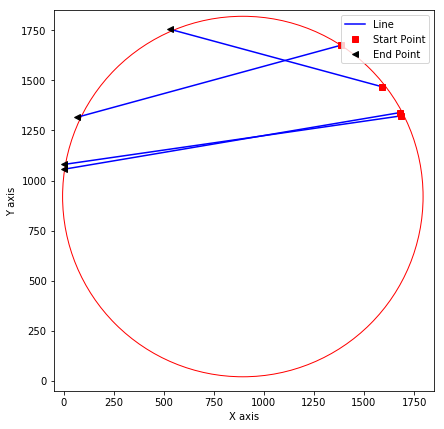

In [54]:
fig = plt.figure(figsize=(10,7))
for kk in [4,5,8,16]:#[0,12,17,21]: #range(0,np.size(sx)):
    plt.plot([sx[indn[kk]], ex[indn[kk]]], [sxy[indn[kk]], exy[indn[kk]]], 'b-')
    plt.plot(ex[indn[kk]], exy[indn[kk]], 'rs')
    plt.plot(sx[indn[kk]], sxy[indn[kk]], 'k<')
    
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('square')
plt.xlim([-50,1850])
plt.ylim([-50,1850])

circle1=plt.Circle((895,920),900,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
plt.legend(['Line','Start Point', 'End Point'])
plt.show()

## Analyze the Bragg Peak

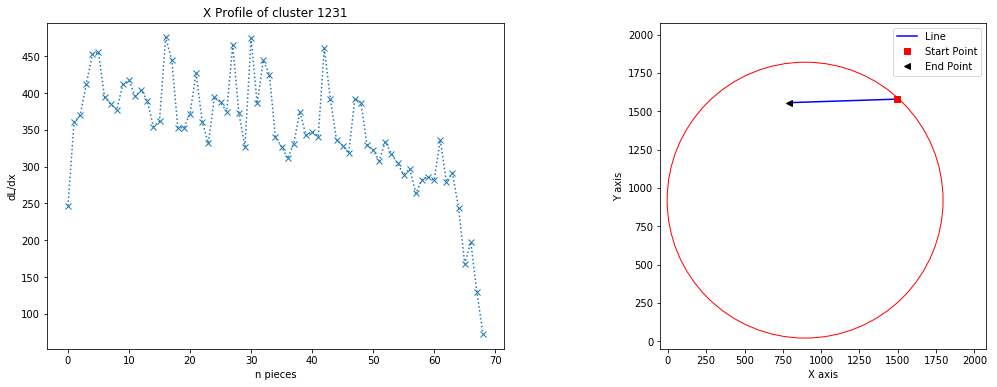

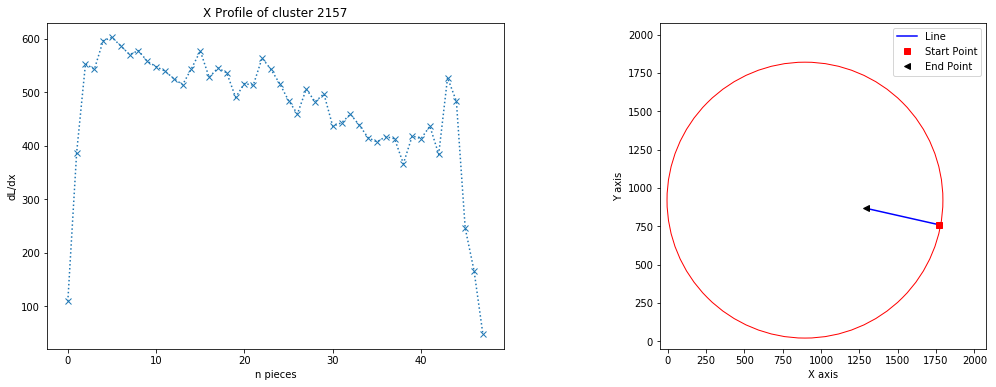

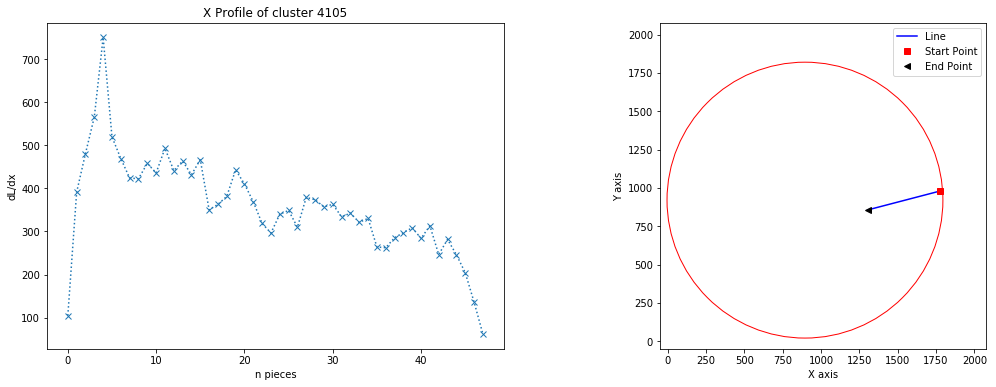

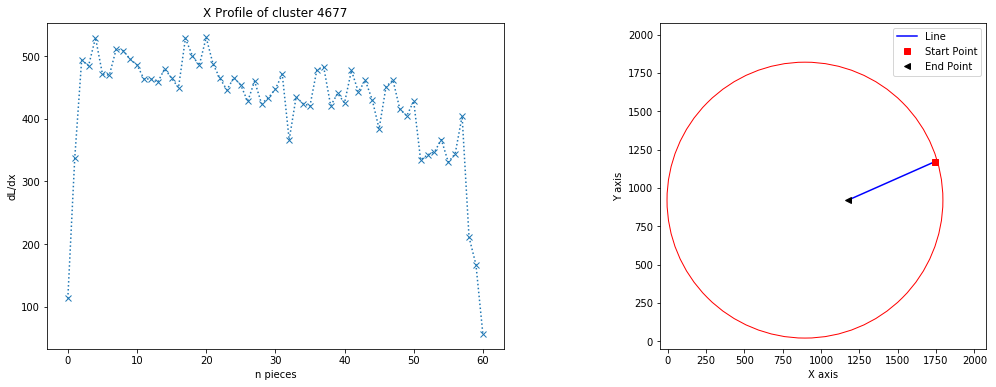

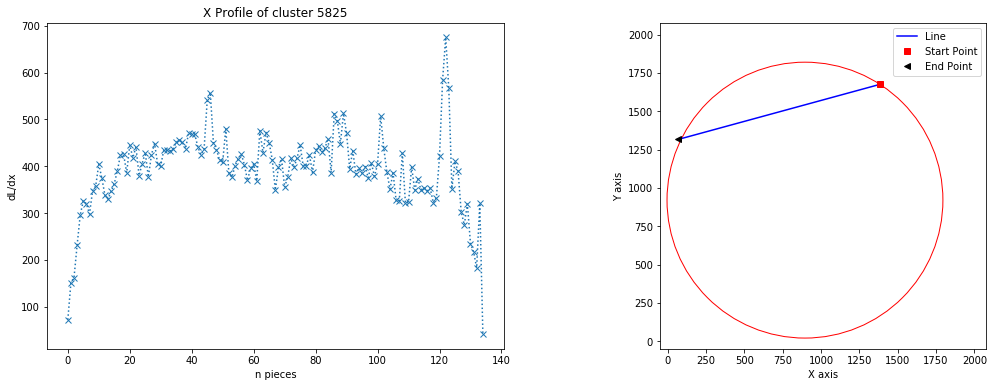

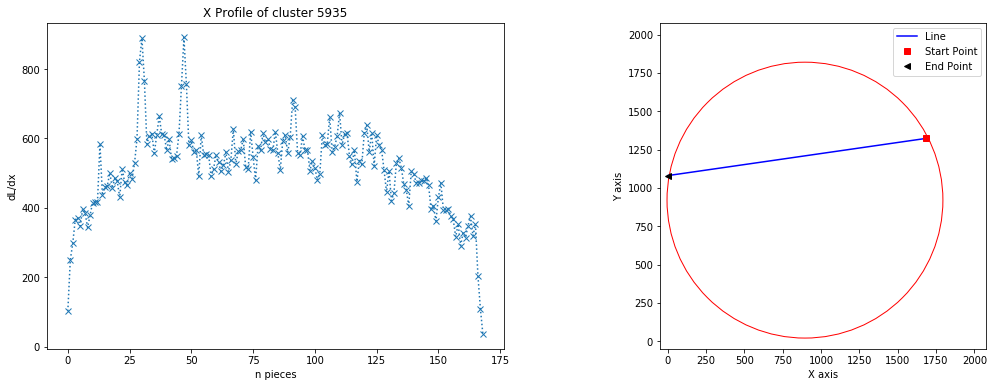

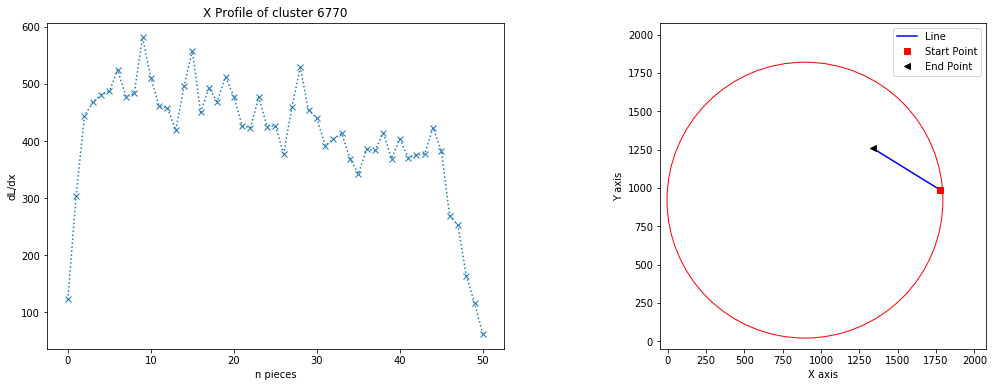

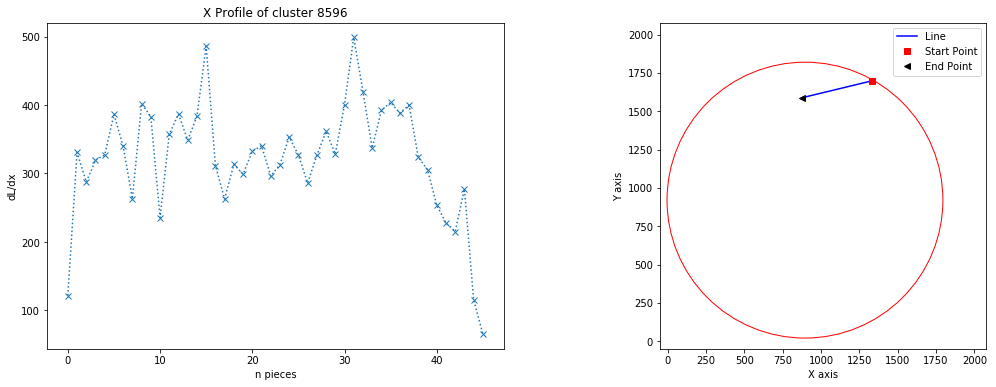

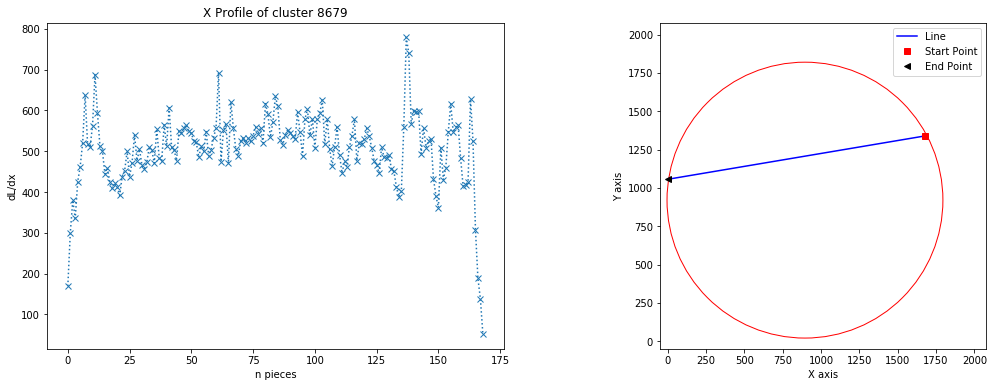

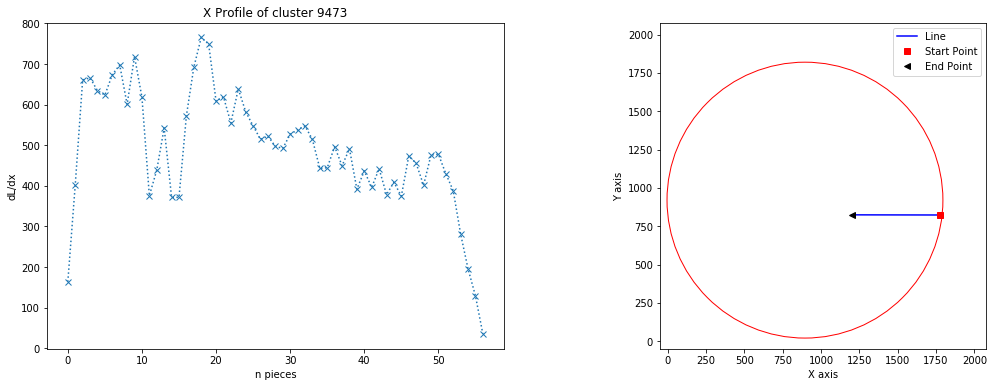

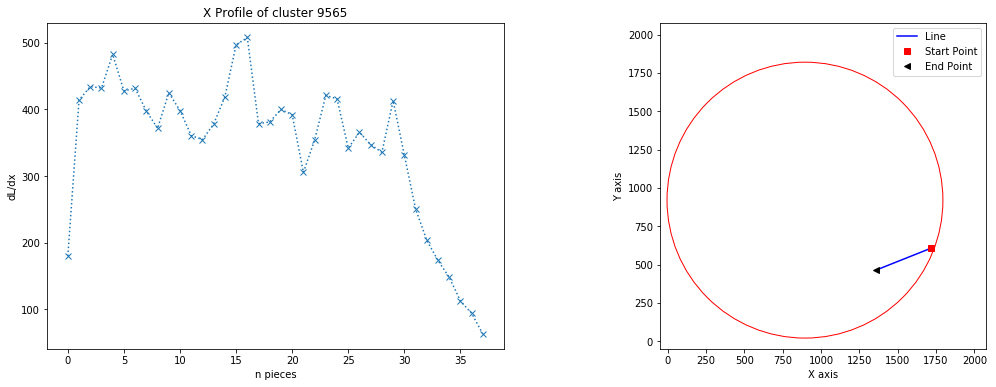

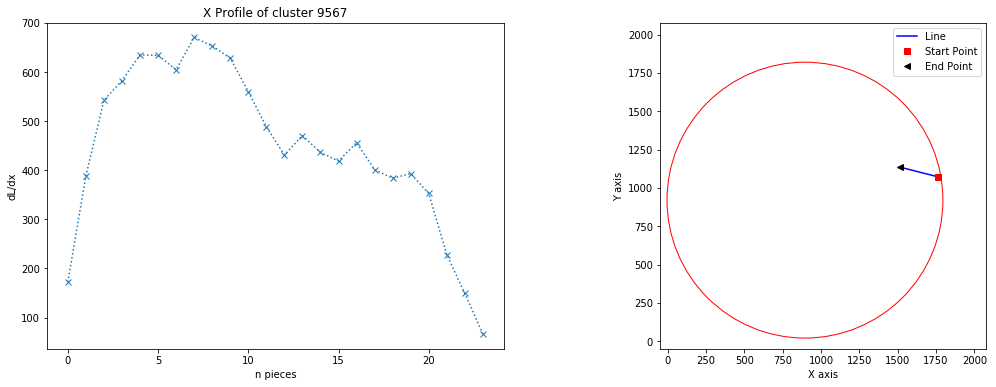

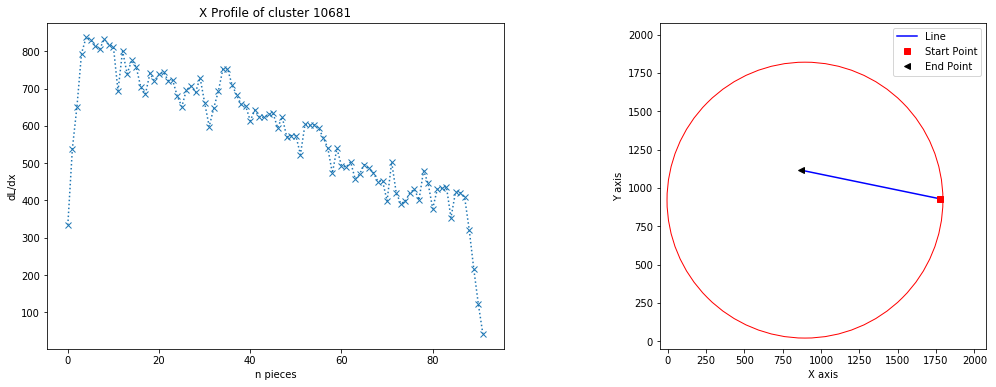

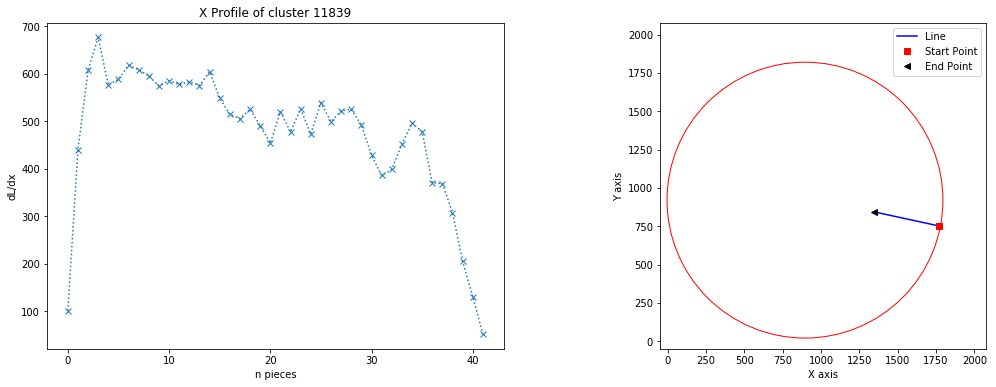

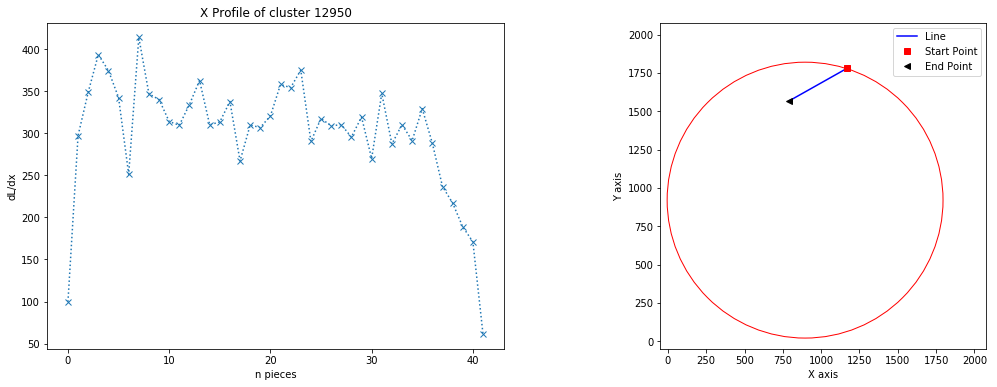

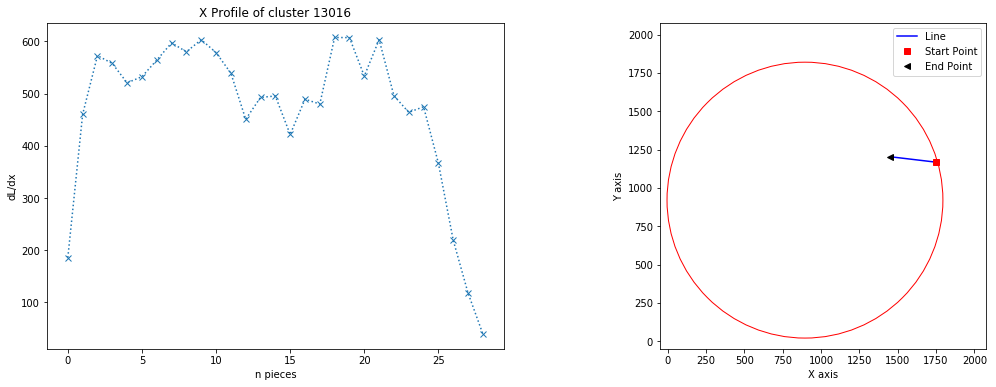

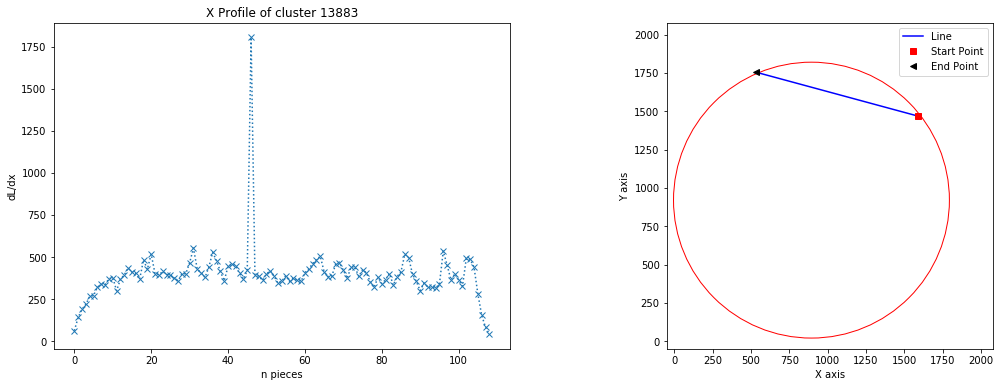

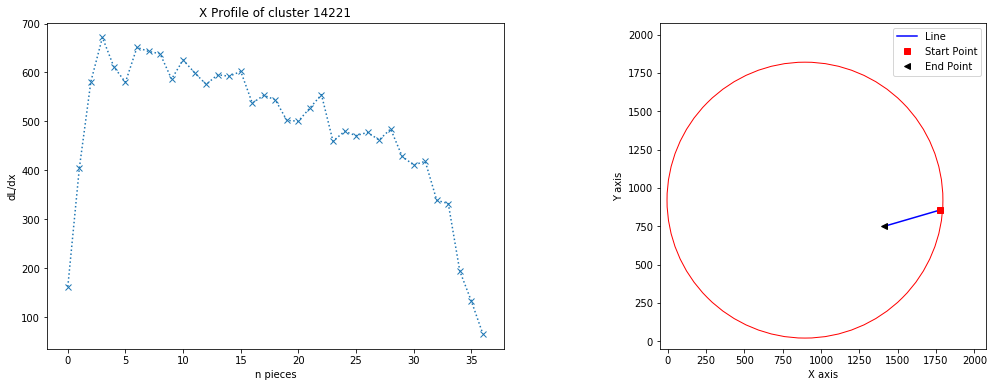

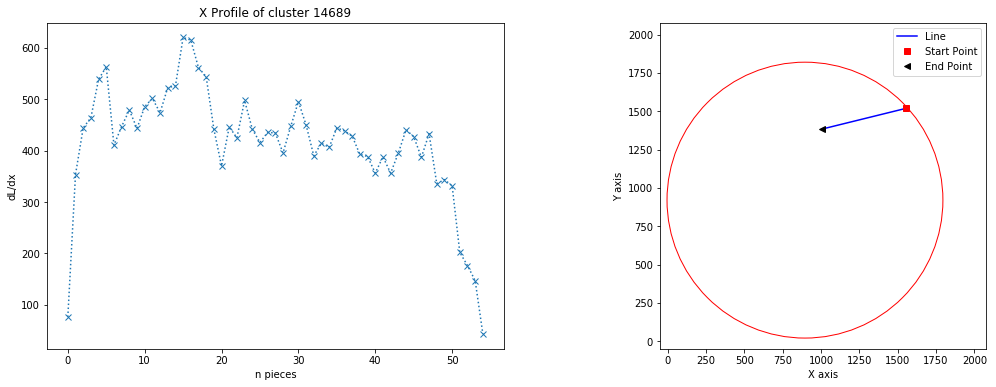

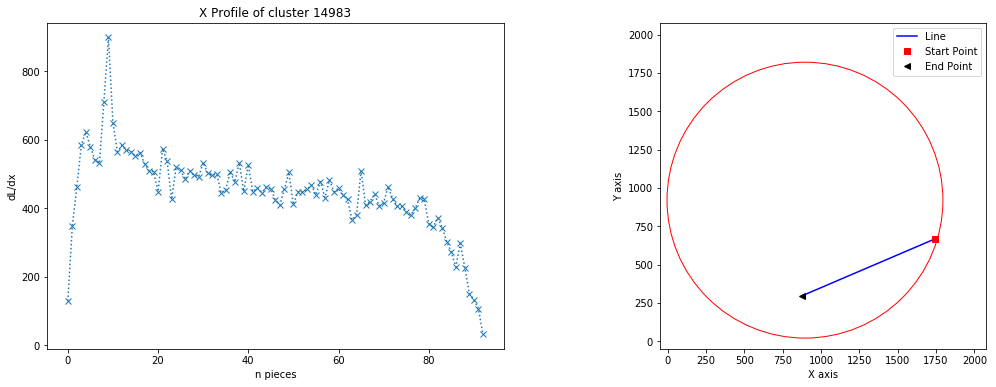

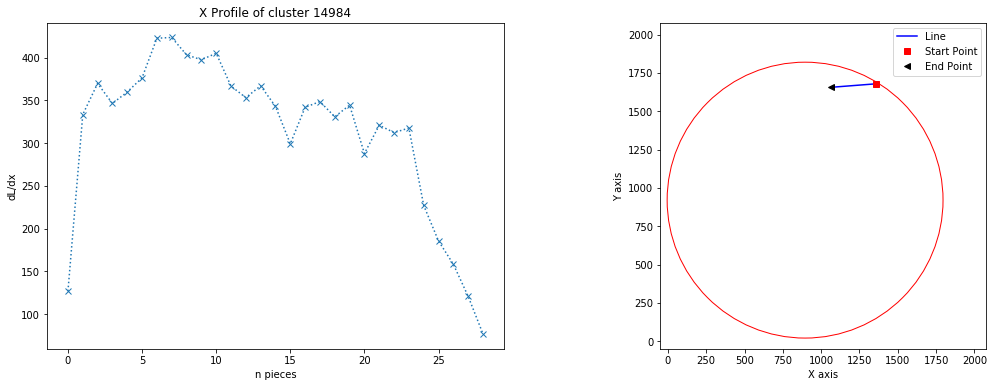

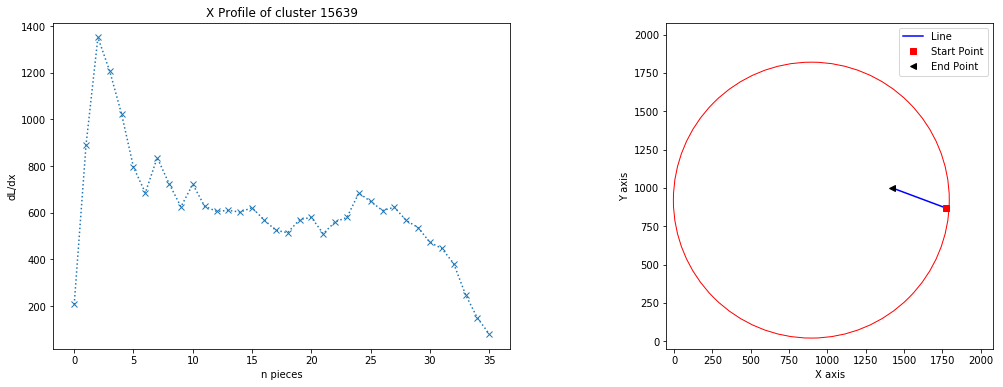

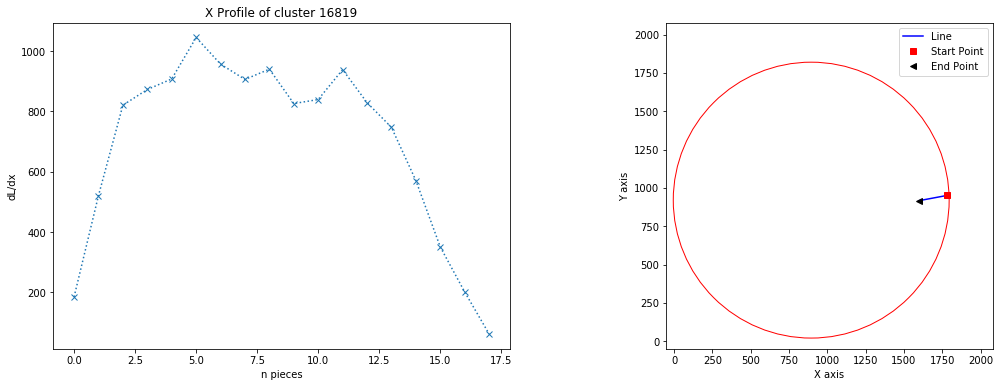

In [55]:
import warnings
warnings.filterwarnings("ignore")

inC,indn = tl.getSignalCircle(featuresL, zX = 895, zY = 920, r = 900, mr = 20, flag = True)

ii=-1

px = 10
p  = 60

for ind in inC:
    ii += 1
#ind = inC[0]

    angle     = tl.getAngle(df.X[ind],df.Y[ind])

    newX,newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

    xm, zs    = tl.plot_shapeprofile(X = newX,Y = newY, L = df.Light[ind], P = 99, px = px, p = p, debug = False, bp = True)
    
    xm        = (xm-np.min(xm)+10)*pixelscale
    zs        = zs/(px)
    #zs = zs/(np.max(zs))
    
    fig, ax   = plt.subplots(1,2,figsize=(18, 6))
    
    #ax[0].plot(xm,zs,'x:')
    #ax[0].set_title("Sum of X Profile")
    #ax[0].set_xlabel("x [mm]")
    #ax[0].set_ylabel("dL/px")
    
    ax[0].plot(np.arange(0,np.size(zs),dtype=int),zs,'x:')
    ax[0].set_title("X Profile of cluster %d" % (ind))
    ax[0].set_xlabel("n pieces")
    ax[0].set_ylabel("dL/dx")
    #plt.ylabel("dL/dx [l/mm]")
    
    tl.plotLineCluster(ax[1],sx[indn[ii]],ex[indn[ii]],sxy[indn[ii]],exy[indn[ii]])
    
    plt.show()
    
    #key = input('Press <ret> to continue -> ')
    #if key == 'stop':
    #    break
    
    plt.close()

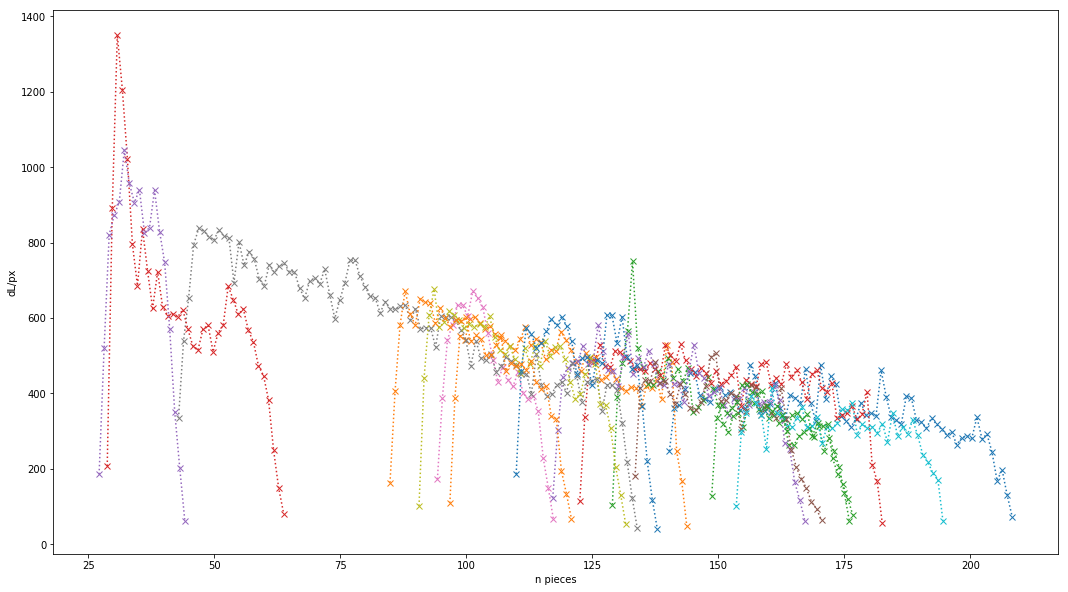

In [53]:
## THE EQUATION NEEDS TO BE RE-SET IF THE NORMALIZATION CHANGES


import warnings
warnings.filterwarnings("ignore")

inC, indn = tl.getSignalCircle(featuresL, zX = 895, zY = 920, r = 900, mr = 20, flag = True)

ii=-1

px = 10

fig = plt.figure(figsize=(18,10))

out = [5825, 5935, 8596, 8679, 9473, 13883, 14689, 14983]

inC = np.setdiff1d(inC,out)


for ind in inC:
    ii += 1
#ind = inC[0]

    angle     = tl.getAngle(df.X[ind],df.Y[ind])

    newX,newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

    xm, zs    = tl.plot_shapeprofile(X = newX,Y = newY, L = df.Light[ind], P = 99, px = px, debug = False, bp = True)
    
    xm        = (xm-np.min(xm)+10)*pixelscale
    zs        = zs/(px)
    
    zmean = np.mean(zs[range(np.int(np.round(np.size(zs)*0.1)),np.int(np.round(np.size(zs)*0.2)))])

    f = xstart(zmean)

    plt.plot((f+np.arange(0,np.size(zs),dtype=int)),zs,'x:')
    
    #key = input('Press <ret> to continue -> ')
    #if key == 'stop':
    #    break

plt.xlabel("n pieces")
plt.ylabel("dL/px")
plt.show()
plt.close()

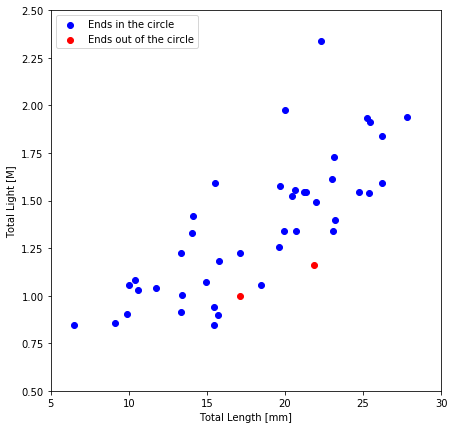

In [27]:
indin,indout = tl.getSignalEndInCircle(featuresL, zX = 895, zY = 920, r = 900, gr = 10)

fig = plt.figure(figsize=(7,7))

plt.scatter(featuresL.WidthX[indin]*pixelscale,featuresL.SumLight[indin]/1e6, c='b', marker='o')
plt.scatter(featuresL.WidthX[indout]*pixelscale,featuresL.SumLight[indout]/1e6, c='r', marker='o')
plt.xlabel('Total Length [mm]')
plt.ylabel('Total Light [M]')
plt.legend(["Ends in the circle", "Ends out of the circle" ])
plt.ylim([0.5,2.5])
plt.xlim([5,30])
plt.show()

# Wrong Clusters

Text(0,0.5,'Max Length on X axis')

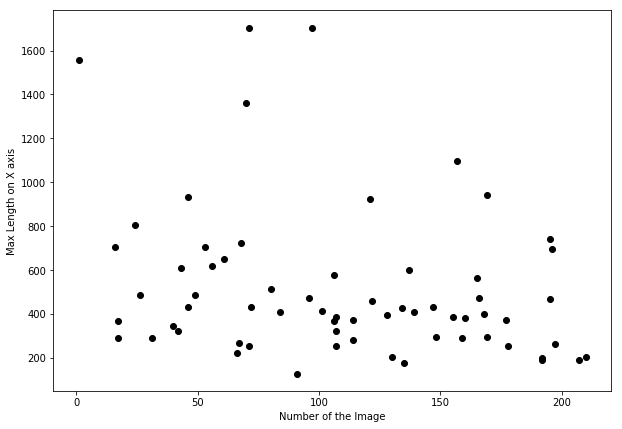

In [28]:
fig = plt.figure(figsize=(10,7))

plt.scatter(featuresL.Image,featuresL.MaxLengthX, c='k', marker='o')
plt.xlabel('Number of the Image')
plt.ylabel('Max Length on X axis')
#plt.ylim([0,200])

# TOOLS

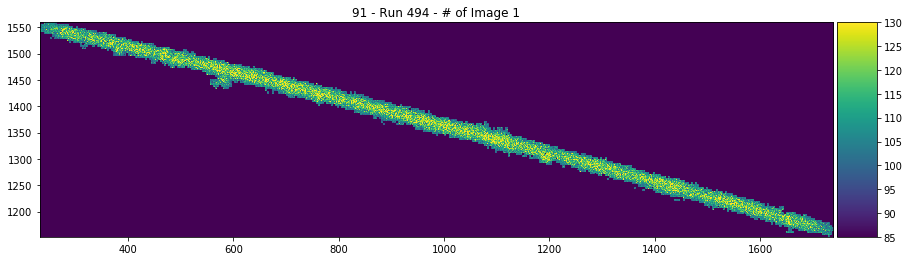

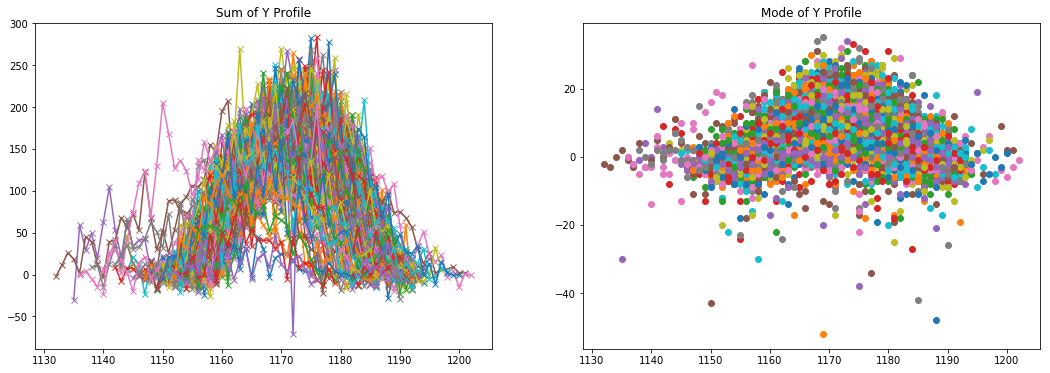

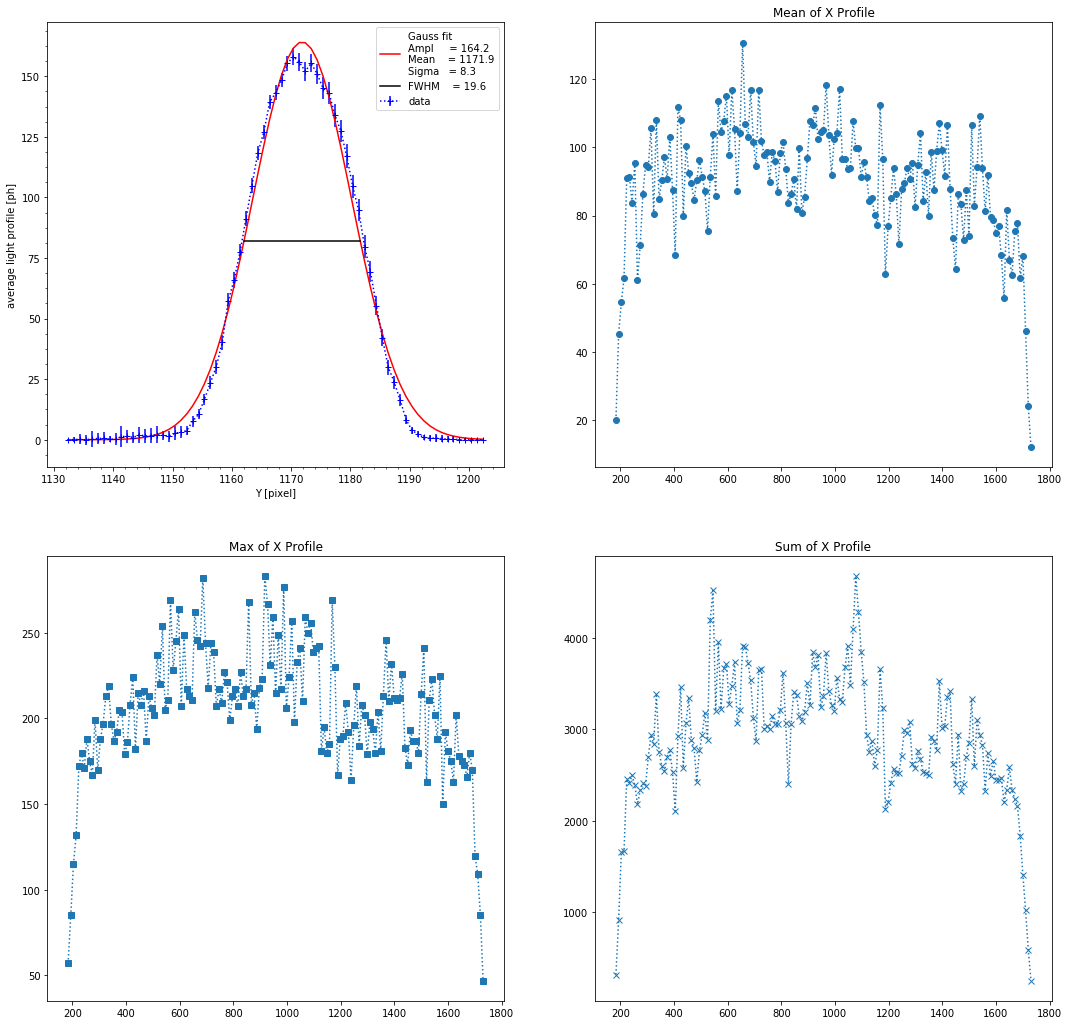

In [29]:
ind = 91

tl.plottingCluster(df,colhead,ind,x_resolution,y_resolution)

angle = tl.getAngle(df.X[ind],df.Y[ind])
    
newX,newY = tl.rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

widthY, widthX, peakX, meanX = tl.plot_shapeprofile(X = newX,Y = newY, L = df.Light[ind], P = df.Pedestal[ind], px = 10, debug = True)
#plot_shapeprofile(X = newX,Y = newY, L = df.Light[91], P = 0, pieces = 140)

## Ploting the specified type of cluster

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


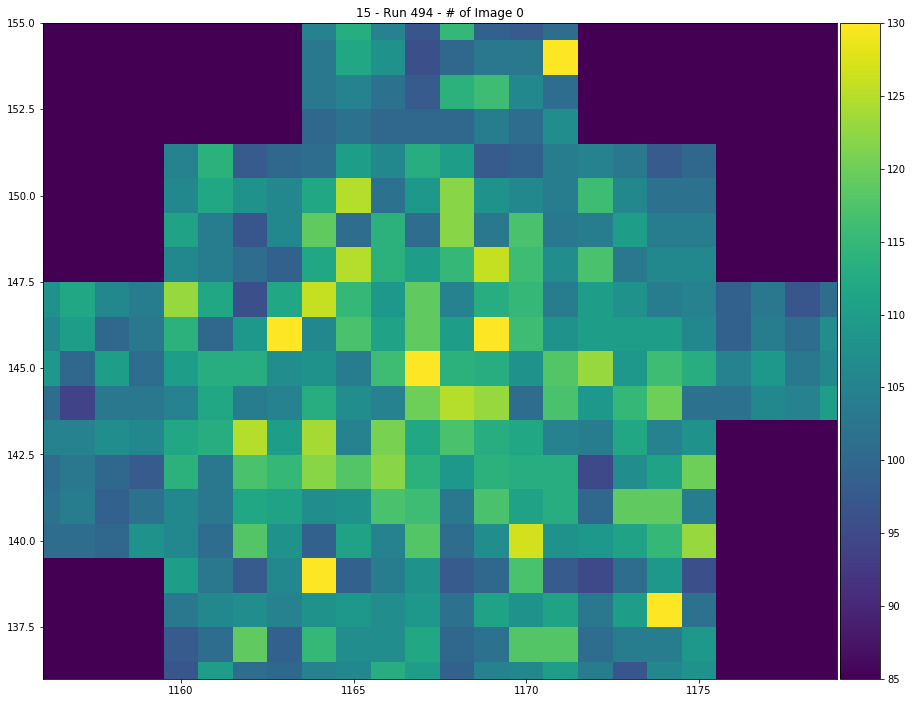

Press <ret> to continue -> stop


In [187]:
#rind = featuresL.index[(featuresL.Image < 210) & (featuresL.SumLight > 1.2e7) & (featuresL.WidthX > 600)]
#rind = [8679]
rindm = df.index[df.Tag == 'm']

#rindm = [1,2,8,11,94,98,100,101,165,166,168,
#          174,240,245,307,308,309,311,378,379,
#          381,382,383,384,389]

#rindm = df.index[df.Tag == 'm'][60:80]

rindl  = df.index[df.Tag == 'l'][0:16]
rindl2 = df.index[df.Tag == 'l'][17:21]

#rinds = df.index[df.Tag == 's'][[2,4,30,42,43]]
#rinds = df.index[df.Tag == 's']
rinds = [15,17,25,29,43,55,56,115,123,182,185,
         186,188,193,197,207,210,211,223,226,229]

rl1   = df.index[df.Image == 13][1]
rl2   = df.index[df.Image == 20][4]
rl3   = df.index[df.Image == 24][[0,10]]
rl4   = df.index[df.Image == 26][[0,6]]

rind = df.index[df.Tag == 'l']
#rind = variableswo.index[(variableswo.PhotonPPixels > 20) & (variableswo.Tag == 'l')]

for ind in rinds:
    tl.plottingCluster(df,colhead,ind,x_resolution,y_resolution)
    key = input('Press <ret> to continue -> ')
    if key == 'stop':
        break
    plt.close

In [182]:
rindm

[1,
 2,
 8,
 11,
 94,
 98,
 100,
 101,
 165,
 166,
 168,
 174,
 240,
 245,
 307,
 308,
 309,
 311,
 378,
 379,
 381,
 382,
 383,
 384,
 389]

In [188]:
#iii = np.concatenate([rindl.tolist(),[rl1.tolist()],[rl2.tolist()],rl3.tolist(),rl4.tolist(),rindm.tolist(),rinds.tolist()]).tolist()
#'LONG'
#iii = np.concatenate([rindl.tolist(),rindl2.tolist()]).tolist()
#'MEDIUM'
#iii = rindm
#'SMALL'
iii = rinds

In [189]:
df.loc[iii]

,Run,Image,Tag,X,Y,Light,Pedestal
15,494,0,s,"[1160, 1160, 1160, 1160, 1161, 1161, 1161, 116...","[136, 137, 138, 139, 136, 137, 138, 139, 136, ...","[97, 98, 103, 110, 110, 101, 106, 103, 101, 11...","[98, 103, 103, 103, 103, 109, 103, 103, 103, 1..."
17,494,0,s,"[968, 968, 968, 968, 969, 969, 969, 969, 970, ...","[228, 229, 230, 231, 228, 229, 230, 231, 228, ...","[103, 99, 106, 97, 107, 96, 98, 98, 102, 105, ...","[102, 102, 102, 105, 104, 102, 104, 102, 103, ..."
25,494,0,s,"[268, 268, 268, 268, 269, 269, 269, 269, 270, ...","[408, 409, 410, 411, 408, 409, 410, 411, 408, ...","[100, 102, 103, 105, 101, 107, 104, 98, 104, 1...","[102, 103, 104, 105, 103, 102, 104, 102, 102, ..."
29,494,0,s,"[1400, 1400, 1400, 1400, 1401, 1401, 1401, 140...","[484, 485, 486, 487, 484, 485, 486, 487, 484, ...","[101, 101, 98, 103, 98, 95, 128, 105, 115, 102...","[104, 102, 104, 102, 103, 97, 104, 101, 102, 1..."
43,494,0,s,"[716, 716, 716, 716, 717, 717, 717, 717, 718, ...","[756, 757, 758, 759, 756, 757, 758, 759, 756, ...","[97, 102, 106, 106, 100, 105, 106, 99, 102, 10...","[102, 103, 105, 103, 102, 103, 102, 102, 102, ..."
55,494,0,s,"[1072, 1072, 1072, 1072, 1073, 1073, 1073, 107...","[876, 877, 878, 879, 876, 877, 878, 879, 876, ...","[106, 99, 103, 98, 100, 101, 111, 103, 100, 10...","[103, 102, 101, 103, 102, 104, 103, 104, 103, ..."
56,494,0,s,"[1628, 1628, 1628, 1628, 1629, 1629, 1629, 162...","[896, 897, 898, 899, 896, 897, 898, 899, 896, ...","[99, 107, 100, 108, 104, 107, 99, 108, 105, 98...","[102, 105, 105, 105, 104, 104, 103, 106, 103, ..."
115,494,1,s,"[508, 508, 508, 508, 509, 509, 509, 509, 510, ...","[524, 525, 526, 527, 524, 525, 526, 527, 524, ...","[98, 101, 96, 106, 99, 104, 101, 98, 110, 106,...","[104, 103, 102, 103, 102, 103, 102, 102, 102, ..."
123,494,1,s,"[472, 472, 472, 472, 473, 473, 473, 473, 474, ...","[740, 741, 742, 743, 740, 741, 742, 743, 740, ...","[108, 98, 99, 108, 100, 107, 104, 103, 102, 10...","[103, 104, 101, 102, 102, 104, 103, 104, 102, ..."
182,494,2,s,"[1312, 1312, 1312, 1312, 1313, 1313, 1313, 131...","[196, 197, 198, 199, 196, 197, 198, 199, 196, ...","[97, 100, 106, 101, 100, 101, 128, 99, 101, 10...","[98, 102, 104, 102, 111, 103, 116, 102, 102, 1..."


In [190]:
prof = df.loc[iii].copy()
prof.head(n=15)

#------------------- Saving File ------------------------------#
directory = ("./data/")          # Directory of the output file
filename  = ("toEff_S")    # Name of the output file
extension = (".csv")             # Extension of the output file
dataout = directory + filename + extension # Full path of the output file

import pandas as pd

#Now you have a csv with columns and index:
prof.to_csv(dataout,index=False)

## BACKUP

In [52]:
def xstart(x):
    yo = np.concatenate([np.linspace(200,300,80), np.linspace(450,550,30), np.linspace(600,800,25), np.linspace(800,1100,15)])
    xo = np.linspace(330,0,np.size(yo))
    
    zo = np.polyfit(yo,xo, 6)
    fo = np.poly1d(zo)
    return fo(x)

33.4654614463675

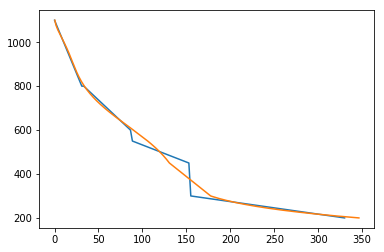

In [51]:
yo = np.concatenate([np.linspace(200,300,80), np.linspace(450,550,30), np.linspace(600,800,25), np.linspace(800,1100,15)])
xo = np.linspace(330,0,np.size(yo))
    
zo = np.polyfit(yo,xo, 6)
fo = np.poly1d(zo)

#xplt = np.arange(0,1200,dtype=int)

plt.plot(xo,yo)
plt.plot(fo(yo),yo)

xstart(800)